# Support Vector Machines

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model as sk_lm
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
from sklearn import svm as sk_svm
import statsmodels.api as sm
import graphviz

### Helper Function for Plotting

In [54]:
# We'll define a function to draw a nice plot of an SVM
def plot_svc(svc, X, y, h=0.02, pad=0.25):
    x_min, x_max = X[:, 0].min()-pad, X[:, 0].max()+pad
    y_min, y_max = X[:, 1].min()-pad, X[:, 1].max()+pad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

    plt.scatter(X[:,0], X[:,1], s=70, c=y, cmap=plt.cm.Paired)
    # Support vectors indicated in plot by vertical lines
    sv = svc.support_vectors_
    plt.scatter(sv[:,0], sv[:,1], c='k', marker='x', s=100, linewidths='1')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()
    print('Number of support vectors: ', svc.support_.size)

### Support Vector Classifier

In [75]:
# Generate random data
np.random.seed(4)
# 2-dim Random numbers from standard normal distribution
X=np.random.randn(20, 2)
X

array([[ 0.05056171,  0.49995133],
       [-0.99590893,  0.69359851],
       [-0.41830152, -1.58457724],
       [-0.64770677,  0.59857517],
       [ 0.33225003, -1.14747663],
       [ 0.61866969, -0.08798693],
       [ 0.4250724 ,  0.33225315],
       [-1.15681626,  0.35099715],
       [-0.60688728,  1.54697933],
       [ 0.72334161,  0.04613557],
       [-0.98299165,  0.05443274],
       [ 0.15989294, -1.20894816],
       [ 2.22336022,  0.39429521],
       [ 1.69235772, -1.11281215],
       [ 1.63574754, -1.36096559],
       [-0.65122583,  0.54245131],
       [ 0.04800625, -2.35807363],
       [-1.10558404,  0.83783635],
       [ 2.08787087,  0.91484096],
       [-0.27620335,  0.7965119 ]])

In [76]:
# Separate points by 1
y = np.repeat([1,-1], 10)
X[y == -1] = X[y == -1]+1
df=pd.DataFrame(X, columns=['x1', 'x2'])
df['y']=y
df.head()

,x1,x2,y
0,0.050562,0.499951,1
1,-0.995909,0.693599,1
2,-0.418302,-1.584577,1
3,-0.647707,0.598575,1
4,0.332250,-1.147477,1


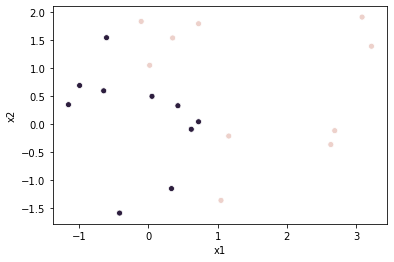

In [77]:
sns.scatterplot(x='x1', y='x2', hue='y', data=df, legend=None)

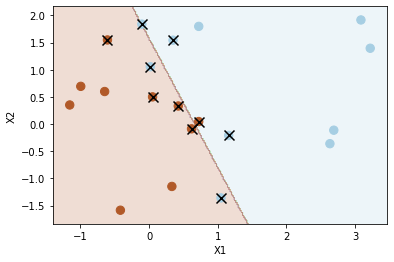

Number of support vectors:  10


In [78]:
# Fit Support Vector Classifier
svc = sk_svm.SVC(C=1, kernel='linear').fit(X, y)
plot_svc(svc,X,y)

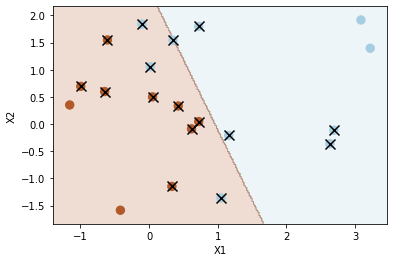

Number of support vectors:  16


In [79]:
# Decreasing Variance, increasing Bias -> Lower C -> Less strict seperation
svc = sk_svm.SVC(C=0.1, kernel='linear').fit(X, y)
plot_svc(svc,X,y)

In [80]:
# Find optimal C by Grid Search
grid = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]}]
grid_svc = sk_msel.GridSearchCV(sk_svm.SVC(kernel='linear'), grid, cv=10, scoring='accuracy').fit(X, y)
grid_svc.best_params_

{'C': 10}

### SVM with non-linear Kernel

In [81]:
np.random.seed(8)
X = np.random.randn(200,2)
X[:100] = X[:100] +2
X[101:150] = X[101:150] -2
y = np.concatenate([np.repeat(-1, 150), np.repeat(1,50)])
df=pd.DataFrame(X, columns=['x1', 'x2'])
df['y']=y
df.head()

,x1,x2,y
0,2.091205,3.091283,-1
1,0.053030,0.613650,-1
2,-0.296492,4.409834,-1
3,3.727836,4.204556,-1
4,2.794828,2.976421,-1


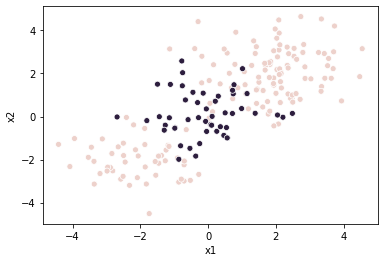

In [82]:
sns.scatterplot(x='x1', y='x2', hue='y', data=df, legend=None)

**-> Use radial kernel**

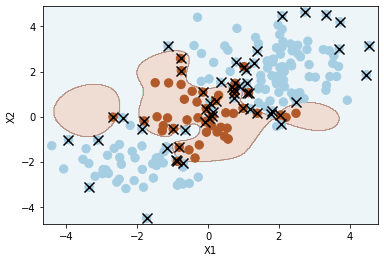

Number of support vectors:  56


In [83]:
svm2 = sk_svm.SVC(C=100, kernel='rbf', gamma=1.0).fit(X, y)
plot_svc(svm2, X, y)

In [85]:
# Optimal C and gamma
grid = [{'C': [0.001, 0.01, 0.1, 1, 5, 10, 100],
         'gamma': [0.25, 0.5, 1, 2, 3, 4, 5]
        }]
grid_svm = sk_msel.GridSearchCV(sk_svm.SVC(kernel='rbf'), grid, cv=10, scoring='accuracy').fit(X, y)
grid_svm.best_params_

{'C': 5, 'gamma': 1}

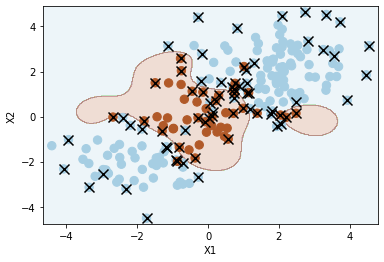

Number of support vectors:  75


In [86]:
svm2 = sk_svm.SVC(C=5, kernel='rbf', gamma=1.0).fit(X, y)
plot_svc(svm2, X, y)